# Predicting Airbnb Listing Prices in Seattle

By: Josh Keating, Ethan Katnic, Christian Hahn, Robin Yang

## Framing the Problem

The purpose of this project is to identify the aspects of Airbnb host listings that have a correlation to the frequency of achieving bookings. This information will allow Airbnb hosts to find and improve certain variables of their listing that can increase their number of bookings. The dataset used was the Seattle Airbnb Open Dataset found on Kaggle (https://www.kaggle.com/airbnb/seattle#calendar.csv). The two CSV files we are using from this set are calendar.csv and listings.csv. The calendar file displays the listing_id, the dates, whether it is available on that date, and the price of booking for that day. The listings file includes a wide variety of metadata scraped from the listing url.

On top of the given columns in the dataset, we used the Microsoft Azure Text Sentiment Analysis API to calculate the sentiment value (on a scale of 1 - 100) of the listing summary. Positive and negative sentiment can be identified and perhaps has a correlation to number of bookings. This was done using post requests on Postman and is known as scores.csv. 

In [2]:
#import
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import linear_model

In [3]:
# read in clean data
airbnb_data_dummies = pd.read_csv('data/cleaned-listings-dummies.csv')
airbnb_data_basic = pd.read_csv('data/cleaned-listings-base.csv')

Text(0.5, 1.0, 'Price of Listing vs. Number of Reviews')

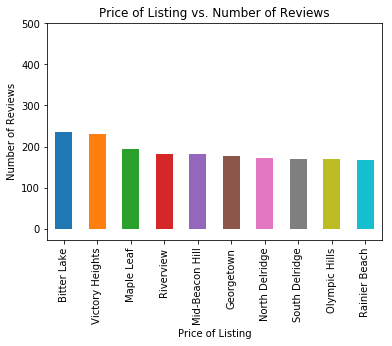

In [5]:
prices_by_neighbourhood = airbnb_data_basic.groupby(['neighbourhood']).mean().price.sort_values(ascending=False)

ten_most_expensive = prices_by_neighbourhood.head(10).plot.bar()
ten_most_expensive.set_xlabel('Neighborhood')
ten_most_expensive.set_ylabel('Price')
ten_most_expensive.set_title('Ten Most Expensive Neighborhoods')

ten_least_expensive = prices_by_neighbourhood.tail(10).plot.bar()
ten_most_expensive.set_xlabel('Neighborhood')
ten_most_expensive.set_ylabel('Price')
ten_most_expensive.set_title('Ten Least Expensive Neighborhoods')

plt.scatter(airbnb_data_basic['price'], airbnb_data_basic['number_of_reviews'])
plt.xlabel('Price of Listing')
plt.ylabel('Number of Reviews')
plt.title('Price of Listing vs. Number of Reviews')

In [27]:
# split into train and test
train_features, test_features, train_outcome, est_outcome = train_test_split(
    airbnb_data_dummies.drop("price", axis=1),
    airbnb_data_dummies.price,
    test_size=0.20
)


In [28]:
# KNN pipeline
knn_pipeline = make_pipeline(
    MinMaxScaler(),
    PolynomialFeatures(),
    KNeighborsRegressor()
)

In [ ]:
# Grid
knn_param_grid = {
              'polynomialfeatures__degree':range(1, 3), 
              'selectkbest__k':['all'],
              'kneighborsregressor__n_neighbors':range(1, 5),
              'kneighborsregressor__weights':["uniform", "distance"]
}